In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data.head()

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### Exploratory Data Analysis - Bivariate analysis


In my EDA, I have identified eight key features that I believe are most closely associated with mental health treatment outcomes. These features are instrumental in understanding the factors that influence whether individuals seek treatment for mental health issues. The features are as follows:

**Age**: Examines age-related variations in seeking mental health treatment.
<br>
**Gender**: Analyzes the impact of gender on treatment-seeking behavior.
<br>
**Family History**: Considers the effect of a family history of mental health issues on seeking treatment.
<br>
**Ease of Taking Medical Leave**: Evaluates how the perceived ease of taking medical leave affects treatment-seeking.
<br>
**Company Size**: Investigates the influence of company size on access to and seeking of mental health treatment.
<br>
**Discussing Mental Health Issues with Employer**: Measures the openness in discussing mental health issues with employers.
<br>
**Discussing Mental Health Issues with Coworkers**: Measures the openness in discussing mental health issues with coworkers.
<br>
**Resources for Employees about Mental Health**: Looks at how the availability of mental health resources impacts treatment-seeking.

##### Age Groups vs. Treatment

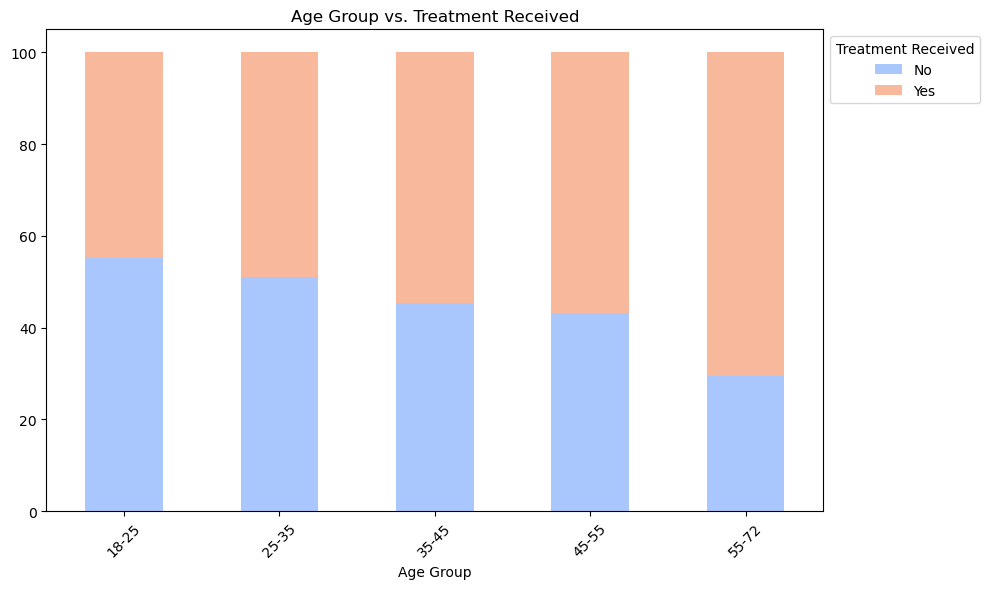

In [15]:
bins = [17, 24, 34, 44, 54, 72]
labels = ['18-25', '25-35', '35-45', '45-55', '55-72']
cleaned_data['age_group'] = pd.cut(cleaned_data['age'], bins = bins, labels = labels)

ctab_age = pd.crosstab(cleaned_data['age_group'], cleaned_data['treatment'], normalize = 'index') * 100

colors = sns.color_palette('coolwarm', len(ctab_age.columns))
ctab_age.plot(kind = 'bar', stacked = True, figsize = (10, 6), color = colors)

plt.title('Age Group vs. Treatment Received')
plt.xlabel('Age Group')
plt.xticks(rotation = 45)
plt.legend(title = 'Treatment Received', bbox_to_anchor = (1, 1), loc = 'upper left')

plt.tight_layout()
plt.show()

##### Gender vs. Treatment

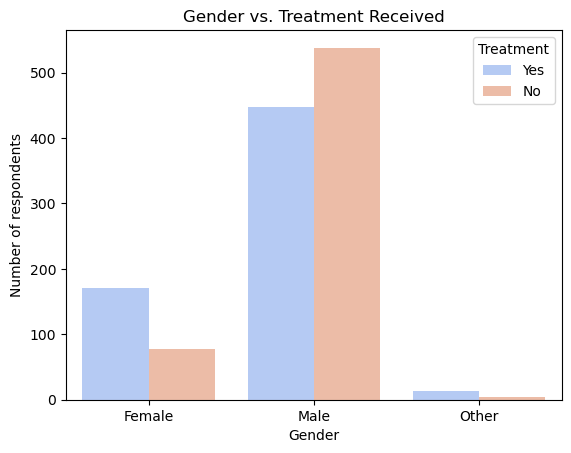

In [16]:
sns.countplot(x = 'gender', hue = 'treatment', data = cleaned_data, palette = 'coolwarm')
plt.title('Gender vs. Treatment Received')
plt.xlabel('Gender')
plt.ylabel('Number of respondents')
plt.legend(title = 'Treatment')
plt.show()

##### Family History vs. Treatment

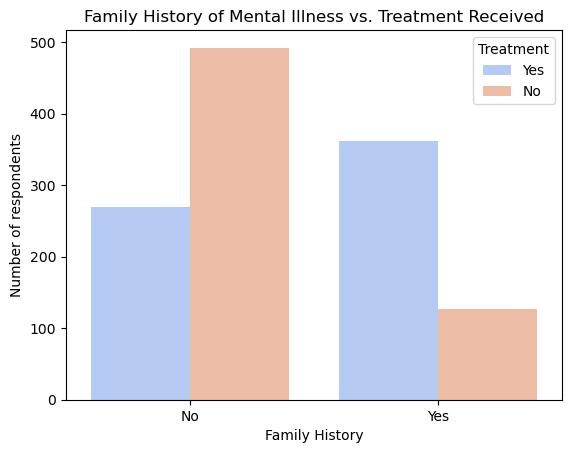

In [17]:
sns.countplot(x = 'family_history', hue = 'treatment', data = cleaned_data, palette = 'coolwarm')
plt.title('Family History of Mental Illness vs. Treatment Received')
plt.xlabel('Family History')
plt.ylabel('Number of respondents')
plt.legend(title = 'Treatment')
plt.show()

##### Ease of Taking Medical Leave vs. Treatment 

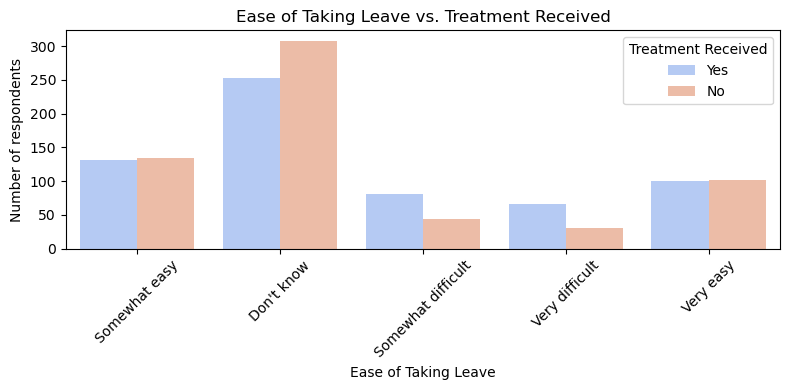

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(x = 'leave', hue = 'treatment', data = cleaned_data, palette = 'coolwarm')

plt.title('Ease of Taking Leave vs. Treatment Received')
plt.xlabel('Ease of Taking Leave')
plt.ylabel('Number of respondents')
plt.xticks(rotation = 45) 
plt.legend(title = 'Treatment Received')

plt.tight_layout()
plt.show()

##### Company Size vs. Treatment

In [19]:
counts_by_company_size_and_treatment = cleaned_data.groupby('no_employees')['treatment'].value_counts().unstack()
print(counts_by_company_size_and_treatment)

treatment        No  Yes
no_employees            
1-5              70   88
100-500          80   95
26-100          139  149
500-1000         33   27
6-25            162  127
More than 1000  135  146


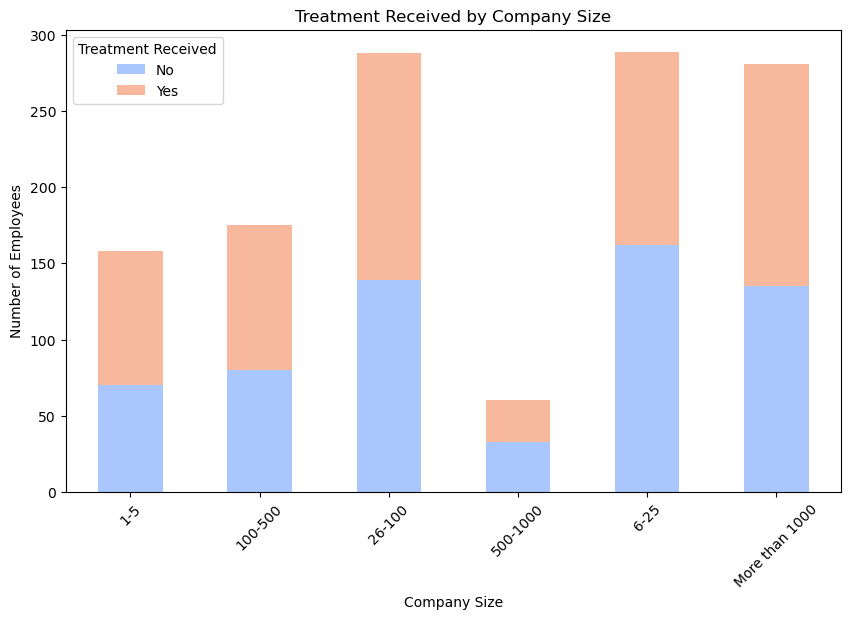

In [20]:
colors = sns.color_palette('coolwarm', len(counts_by_company_size_and_treatment.columns))
counts_by_company_size_and_treatment.plot(kind = 'bar', stacked = True, figsize = (10, 6), color = colors)

plt.title('Treatment Received by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Employees')
plt.xticks(rotation = 45)
plt.legend(title = 'Treatment Received')

plt.show()

##### Discussing mental health with employer vs. Treatment 

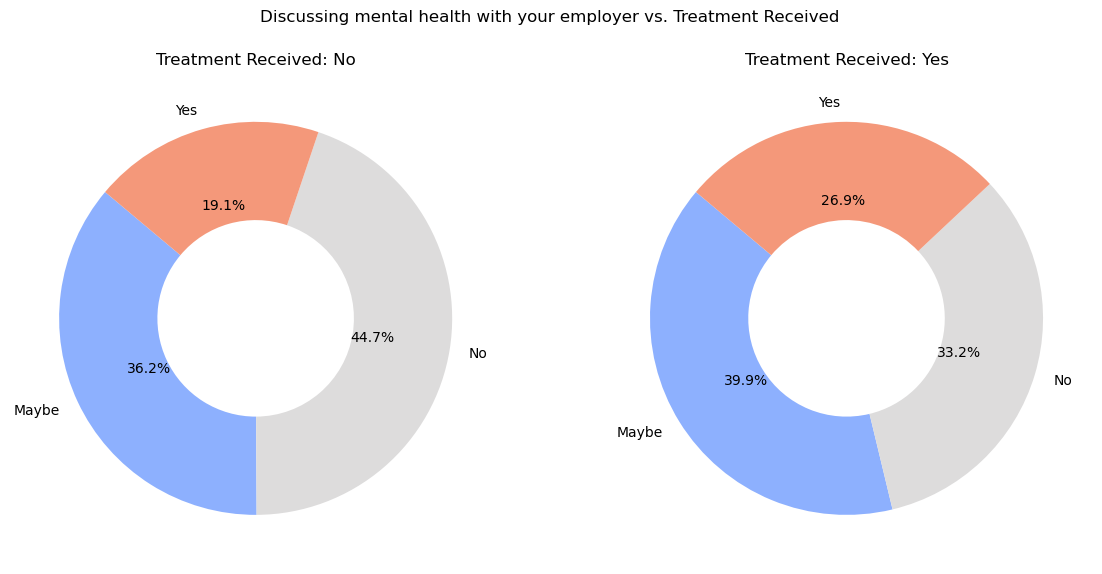

In [21]:
grouped = cleaned_data.groupby(['treatment', 'mental_health_consequence']).size().unstack(fill_value = 0)

colors = sns.color_palette('coolwarm', n_colors = len(grouped.columns))
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
axes = axes.flatten()

for i, (treatment_status, data) in enumerate(grouped.iterrows()):
    axes[i].pie(data, labels = data.index, autopct = '%1.1f%%', startangle = 140, colors = colors, wedgeprops = dict(width = 0.5))
    axes[i].set_title(f'Treatment Received: {treatment_status}')

plt.suptitle('Discussing mental health with your employer vs. Treatment Received')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

##### Discussing mental health with coworkers vs. Treatment

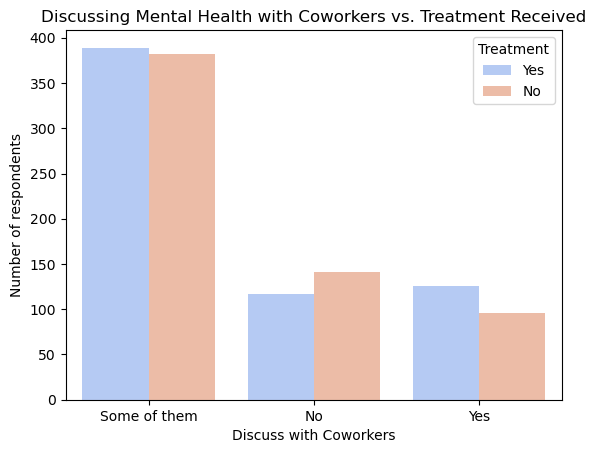

In [22]:
sns.countplot( x ='coworkers', hue = 'treatment', data = cleaned_data, palette = 'coolwarm')
plt.title('Discussing Mental Health with Coworkers vs. Treatment Received')
plt.xlabel('Discuss with Coworkers')
plt.ylabel('Number of respondents')
plt.legend(title = 'Treatment')
plt.show()

##### Resources for Mental Health Education and Support at Work vs. Treatment

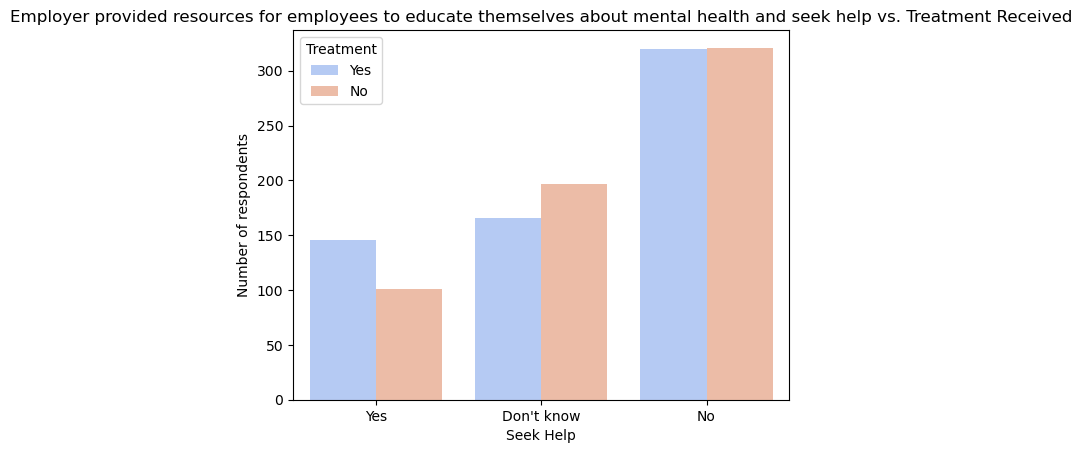

In [23]:
sns.countplot(x = 'seek_help', hue = 'treatment', data = cleaned_data, palette = 'coolwarm')
plt.title('Employer provided resources for employees to educate themselves about mental health and seek help vs. Treatment Received')
plt.xlabel('Seek Help')
plt.ylabel('Number of respondents')
plt.legend(title = 'Treatment')
plt.show()